### dset check 
(note: the dataset is introduced and prepared in glacier-mapping repo:    
https://github.com/Hydrological-Observation-Group/glacier-mapping.git)
1. check pair-wise image and truth 
2. check the distribution of the dset. 

In [ ]:
import numpy as np
from glob import glob
import rasterio as rio
import geopandas as gpd
import cartopy.crs as ccrs
from rasterio.crs import CRS
import matplotlib.pyplot as plt
from utils.imgShow import imsShow
# from shapely.geometry import Point
import cartopy.feature as cfeature
from utils.transform_xy import coor2coor


In [4]:
paths_truth = sorted(glob('data/dset/truth/*.tif'))
paths_scene = [path.replace('truth','scene') for path in paths_truth]
paths_dem = [path.replace('.tif', '_dem.tif').replace('truth','dem') 
                    for path in paths_truth]
names_satellite = [path_truth.split('/')[-1][0:2] 
                        for path_truth in paths_truth] 
print('Number of scenes:', len(paths_scene)) 
print('Satellite:', names_satellite[0])  


Number of scenes: 65
Satellite: l5


#### 1. Check the pair-wise sence and truth images


data/dset/scene/l8_scene_05.tif


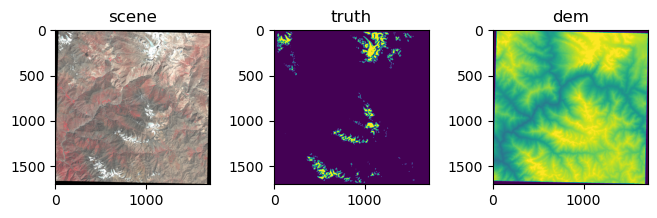

data/dset/scene/l8_scene_06.tif


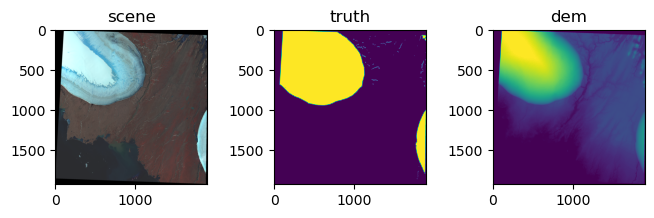

data/dset/scene/l8_scene_07.tif


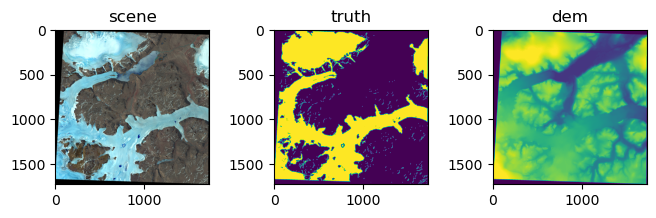

In [5]:
dset = list(zip(paths_scene, paths_truth, paths_dem))
for path_scene, path_truth, path_dem in dset[30:33]:
        print(path_scene)
        scene_rio = rio.open(path_scene)
        dem_rio = rio.open(path_dem)
        truth_rio = rio.open(path_truth)
        scene_truth_arr = [scene_rio.read([2,3,4]).transpose(1,2,0), 
                           truth_rio.read(1), dem_rio.read(1)]
        imsShow(img_list=scene_truth_arr,
                img_name_list=['scene', 'truth', 'dem'], figsize=(8,2))
        plt.show()


#### check the distribution of dataset

In [10]:
path_scene_center = 'data/dset/dset.gpkg'
centers_scene = gpd.read_file(path_scene_center)
centers_scene.head()


,satellite,id_scene,geometry
0,l5,l5_scene_01,POINT (-73.26382 -46.03553)
1,l5,l5_scene_02,POINT (-26.08861 80.77256)
2,l5,l5_scene_03,POINT (-26.53769 81.76799)
3,l5,l5_scene_04,POINT (-18.2508 64.24576)
4,l5,l5_scene_05,POINT (-81.61367 74.72153)


In [11]:
sat_colors = {'l5': 'red', 
              'l7': 'green', 
              'l8': 'blue', 
              'l9': 'orange', 
              's2': 'purple'}


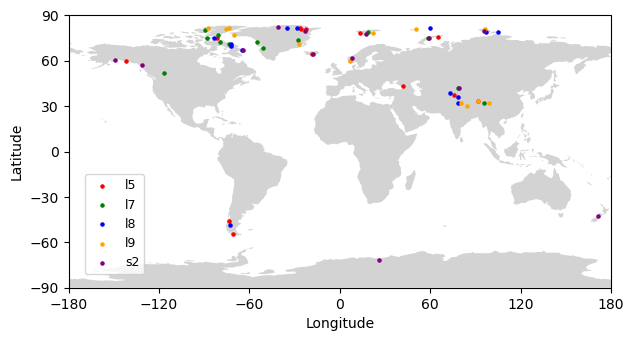

In [12]:
fig, ax = plt.subplots(figsize=(7, 5), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_extent([-180, 180, -90, 90])
for sat, color in sat_colors.items():
    centers_scene[centers_scene.satellite == sat].plot(
                    ax=ax, color=color, markersize=5, label=sat)

ax.legend(loc=(0.03,0.05), fontsize=9)
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax.tick_params(labelsize=10)
# # fig.savefig('figures/dset_distribution.png')



#### check the traset and valset

In [7]:
dset_tra_gdf = gpd.read_file('data/dset/dset_tra.gpkg')
dset_val_gdf = gpd.read_file('data/dset/dset_val.gpkg') 


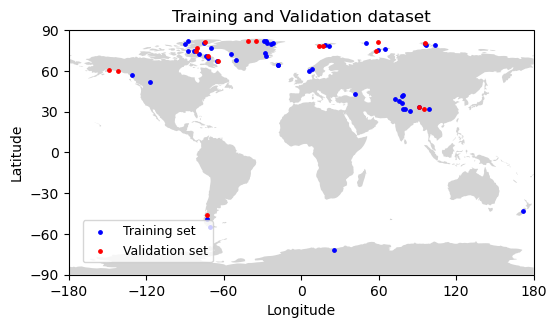

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), 
                subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_extent([-180, 180, -90, 90])
dset_tra_gdf.plot(ax=ax, 
                    markersize=6, 
                    color='blue',
                    label='Training set')
dset_val_gdf.plot(ax=ax, 
                    markersize=6, 
                    color='red',
                    label='Validation set')
ax.set_title('Training and Validation dataset')
ax.legend(loc=(0.03,0.05), fontsize=9)
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax.tick_params(labelsize=10)
# fig.savefig('figs/traset_valset.png', dpi=300)

